## **ETL**

- Processamento, tratamento e junção dos dados fornecidos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Bibliotecas essenciais
import pandas as pd


Mounted at /content/drive


In [ ]:
base_path = '/content/drive/MyDrive/Projeto Análise de risco de crédito/'

# Definindo os principais datasets
path_train = base_path + 'application_train.csv'
path_bureau = base_path + 'bureau.csv'
path_bureau_balance = base_path + 'bureau_balance.csv'
path_previous_app = base_path + 'previous_application.csv'

print("Caminhos definidos com sucesso!")


Caminhos definidos com sucesso!


In [ ]:
application_train = pd.read_csv(path_train)
bureau = pd.read_csv(path_bureau)
bureau_balance = pd.read_csv(path_bureau_balance)
previous_application = pd.read_csv(path_previous_app)

# Verificando dimensões
print("Dimensões dos datasets:")
print(f"application_train: {application_train.shape}")
print(f"bureau: {bureau.shape}")
print(f"bureau_balance: {bureau_balance.shape}")
print(f"previous_application: {previous_application.shape}")


Dimensões dos datasets:
application_train: (307511, 122)
bureau: (1716428, 17)
bureau_balance: (27299925, 3)
previous_application: (1670214, 37)


In [ ]:
# Exibir primeiras linhas de cada dataset
print("===== application_train =====")
display(application_train.head(3))

print("===== bureau =====")
display(bureau.head(3))

print("===== bureau_balance =====")
display(bureau_balance.head(3))

print("===== previous_application =====")
display(previous_application.head(3))


===== application_train =====


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


===== bureau =====


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN


===== bureau_balance =====


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C


===== previous_application =====


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0


In [ ]:
# verifica informações de cada dataset proposto e as colunas com mais valores ausentes de cada um
for name, df in {
    "application_train": application_train,
    "bureau": bureau,
    "bureau_balance": bureau_balance,
    "previous_application": previous_application
}.items():
    print(f"{name}")
    print(df.info())
    missing = df.isna().mean().sort_values(ascending=False).head(10)
    print("\n🔎 Top 10 colunas com mais valores ausentes:")
    print(missing)
    print("-" * 50)


application_train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None

🔎 Top 10 colunas com mais valores ausentes:
COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
COMMONAREA_MEDI             0.698723
NONLIVINGAPARTMENTS_MEDI    0.694330
NONLIVINGAPARTMENTS_MODE    0.694330
NONLIVINGAPARTMENTS_AVG     0.694330
FONDKAPREMONT_MODE          0.683862
LIVINGAPARTMENTS_AVG        0.683550
LIVINGAPARTMENTS_MEDI       0.683550
LIVINGAPARTMENTS_MODE       0.683550
dtype: float64
--------------------------------------------------
bureau
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE  

Formato inicial: 307511 linhas e 122 colunas

Colunas com mais de 20% de valores nulos:


,0
COMMONAREA_AVG,69.872297
COMMONAREA_MODE,69.872297
COMMONAREA_MEDI,69.872297
NONLIVINGAPARTMENTS_MEDI,69.432963
NONLIVINGAPARTMENTS_MODE,69.432963
NONLIVINGAPARTMENTS_AVG,69.432963
FONDKAPREMONT_MODE,68.386172
LIVINGAPARTMENTS_AVG,68.354953
LIVINGAPARTMENTS_MEDI,68.354953
LIVINGAPARTMENTS_MODE,68.354953



Tipos de dados:
float64    65
int64      41
object     16
Name: count, dtype: int64

Número de variáveis numéricas: 106
Número de variáveis categóricas: 16


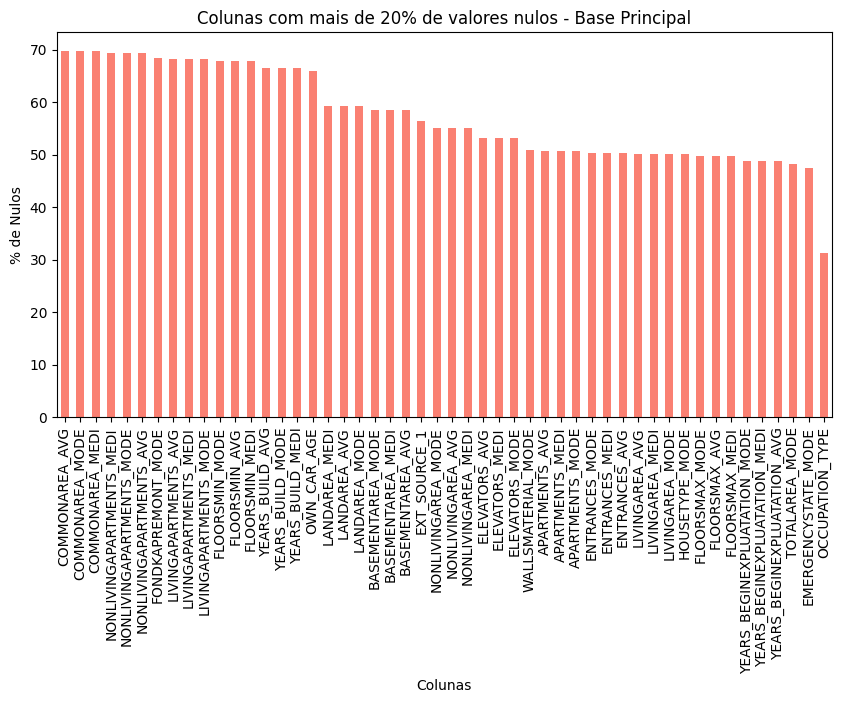

In [ ]:
# Importando bibliotecas
import pandas as pd

# Caminho do dataset no Google Drive
caminho_base = "/content/drive/MyDrive/Projeto Análise de risco de crédito/application_train.csv"

# Carrega a base principal
app_train = pd.read_csv(caminho_base)

# Visualiza formato inicial
print(f"Formato inicial: {app_train.shape[0]} linhas e {app_train.shape[1]} colunas\n")

# Mostra o percentual de valores nulos por coluna
missing_values = app_train.isnull().mean().sort_values(ascending=False) * 100

# Exibe apenas as colunas com mais de 20% de valores ausentes
missing_over_20 = missing_values[missing_values > 20]

print("Colunas com mais de 20% de valores nulos:")
display(missing_over_20)

# Estatísticas rápidas para entender tipos de variáveis
print("\nTipos de dados:")
print(app_train.dtypes.value_counts())

# Verificar colunas que são numéricas e categóricas separadamente
num_cols = app_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = app_train.select_dtypes(include=['object']).columns

print(f"\nNúmero de variáveis numéricas: {len(num_cols)}")
print(f"Número de variáveis categóricas: {len(cat_cols)}")

# Plotando visualização rápida dos nulos (se quiser rodar no Colab)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
missing_over_20.plot(kind='bar', color='salmon')
plt.title('Colunas com mais de 20% de valores nulos - Base Principal')
plt.ylabel('% de Nulos')
plt.xlabel('Colunas')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Lista de colunas identificadas anteriormente
cols_drop = [
    'COMMONAREA_AVG', 'COMMONAREA_MODE', 'COMMONAREA_MEDI',
    'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
    'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI',
    'LIVINGAPARTMENTS_MODE', 'FLOORSMIN_MODE', 'FLOORSMIN_AVG', 'FLOORSMIN_MEDI',
    'YEARS_BUILD_AVG', 'YEARS_BUILD_MODE', 'YEARS_BUILD_MEDI',
    'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_AVG', 'LANDAREA_MODE',
    'BASEMENTAREA_MODE', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
    'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI',
    'ELEVATORS_AVG', 'ELEVATORS_MEDI', 'ELEVATORS_MODE',
    'APARTMENTS_AVG', 'APARTMENTS_MEDI', 'APARTMENTS_MODE',
    'ENTRANCES_MODE', 'ENTRANCES_MEDI', 'ENTRANCES_AVG',
    'LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'LIVINGAREA_MODE',
    'FLOORSMAX_MODE', 'FLOORSMAX_AVG', 'FLOORSMAX_MEDI',
    'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_AVG',
    'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE', 'WALLSMATERIAL_MODE',
    'HOUSETYPE_MODE'
]

# Remoção
app_train.drop(columns=cols_drop, inplace=True, errors='ignore')
print(f"Colunas removidas (>60% nulos): {len(cols_drop)}")
print(f"Formato após remoção: {app_train.shape}")


Colunas removidas (>60% nulos): 48
Formato após remoção: (307511, 74)


In [ ]:
# Imputação da variável EXT_SOURCE_1 (score externo)
if 'EXT_SOURCE_1' in app_train.columns:
    mediana_ext = app_train['EXT_SOURCE_1'].median()
    app_train['EXT_SOURCE_1'].fillna(mediana_ext, inplace=True)
    print(f"EXT_SOURCE_1 imputada com a mediana: {round(mediana_ext, 3)}")

# Imputação da variável OCCUPATION_TYPE (categórica)
if 'OCCUPATION_TYPE' in app_train.columns:
    app_train['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)
    print("OCCUPATION_TYPE imputada com categoria 'Unknown'")


EXT_SOURCE_1 imputada com a mediana: 0.506
OCCUPATION_TYPE imputada com categoria 'Unknown'


/tmp/ipython-input-2350437750.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  app_train['EXT_SOURCE_1'].fillna(mediana_ext, inplace=True)
/tmp/ipython-input-2350437750.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [ ]:
# Separar por tipo de variável
num_cols = app_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = app_train.select_dtypes(include=['object']).columns

# Imputar valores numéricos com a mediana
app_train[num_cols] = app_train[num_cols].apply(lambda x: x.fillna(x.median()))

# Imputar valores categóricos com a moda
app_train[cat_cols] = app_train[cat_cols].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

print("Imputação automática concluída.")


Imputação automática concluída.


In [ ]:
# Percentual de nulos restante
missing_after = app_train.isnull().mean().sort_values(ascending=False)
missing_after = missing_after[missing_after > 0]

if missing_after.empty:
    print("Nenhum valor nulo restante na base principal.")
else:
    print("Ainda restam colunas com nulos (analisar manualmente):")
    display(missing_after.head(10))

# Shape final
print(f"Formato final da base principal: {app_train.shape}")


Nenhum valor nulo restante na base principal.
Formato final da base principal: (307511, 74)


In [ ]:
# Caminho do arquivo dentro do Google Drive
caminho_bureau = '/content/drive/MyDrive/Projeto Análise de risco de crédito/bureau.csv'

# Leitura do arquivo
bureau = pd.read_csv(caminho_bureau)

# Exibe informações básicas
print("Formato da base bureau:", bureau.shape)
print("\nVisualização inicial:")
display(bureau.head())

# Estatísticas gerais e tipos de dados
print("\nResumo das colunas:")
print(bureau.info())

# Porcentagem de valores nulos por coluna
print("\nPercentual de valores nulos (%):")
print(bureau.isnull().mean().sort_values(ascending=False) * 100)


Formato da base bureau: (1716428, 17)

Visualização inicial:


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN



Resumo das colunas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None

Percentual de valores nulos (%):
AMT_ANNUITY               71.473490
AMT_CREDIT_MAX_OVERDUE  

In [ ]:
# Verificação de duplicatas e IDs

# Verificar se SK_ID_BUREAU é único
unique_bureau_ids = bureau['SK_ID_BUREAU'].is_unique
print(f"SK_ID_BUREAU é único? {unique_bureau_ids}")

# Contar duplicatas completas (linhas idênticas)
duplicated_rows = bureau.duplicated().sum()
print(f"Linhas duplicadas encontradas: {duplicated_rows}")

# Caso existam duplicatas, removê-las (por segurança, inplace=False para inspecionar antes)
if duplicated_rows > 0:
    bureau = bureau.drop_duplicates()
    print(f"Duplicatas removidas. Novo formato: {bureau.shape}")
else:
    print("Nenhuma duplicata completa encontrada.")

# Verificar quantos IDs únicos de cliente (SK_ID_CURR) existem
unique_clients = bureau['SK_ID_CURR'].nunique()
total_rows = bureau.shape[0]
print(f"Clientes únicos: {unique_clients}")
print(f"Total de registros: {total_rows}")
print(f"Média de registros por cliente: {total_rows / unique_clients:.2f}")


SK_ID_BUREAU é único? True
Linhas duplicadas encontradas: 0
Nenhuma duplicata completa encontrada.
Clientes únicos: 305811
Total de registros: 1716428
Média de registros por cliente: 5.61


In [ ]:


# Remover colunas com mais de 50% de nulos
null_threshold = 0.5
cols_to_drop = bureau.columns[bureau.isnull().mean() > null_threshold]
print(f"Colunas removidas (>50% nulos): {list(cols_to_drop)}")

bureau = bureau.drop(columns=cols_to_drop)

# Imputação de valores nulos remanescentes
# Substitui NaN por 0 para colunas financeiras e dias (pois indicam "sem dívida" ou "sem data registrada")
cols_to_fill = ['AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
                'AMT_CREDIT_SUM_OVERDUE', 'DAYS_ENDDATE_FACT', 'DAYS_CREDIT_ENDDATE']

for col in cols_to_fill:
    if col in bureau.columns:
        bureau[col] = bureau[col].fillna(0)

# Checar outliers em colunas de valores
cols_to_check = [c for c in bureau.columns if 'AMT_' in c or 'DAYS_' in c]
summary_stats = bureau[cols_to_check].describe().T
print("Estatísticas resumidas (para inspeção de outliers):")
display(summary_stats)

# Verificação final de nulos
print("\n Percentual de valores nulos após tratamento:")
print(bureau.isnull().mean().sort_values(ascending=False).head(10))

print(f"\n Formato final do bureau após limpeza: {bureau.shape}")


Colunas removidas (>50% nulos): ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Estatísticas resumidas (para inspeção de outliers):


,count,mean,std,min,25%,50%,75%,max
DAYS_CREDIT,1716428.0,-1142.107685,7.951649e+02,-2922.000,-1666.0,-987.0,-474.0,0.000000e+00
DAYS_CREDIT_ENDDATE,1716428.0,479.122722,4.839776e+03,-42060.000,-1074.0,-237.0,389.0,3.119900e+04
DAYS_ENDDATE_FACT,1716428.0,-641.830306,7.501202e+02,-42023.000,-1089.0,-352.0,0.0,0.000000e+00
AMT_CREDIT_SUM,1716415.0,354994.591918,1.149811e+06,0.000,51300.0,125518.5,315000.0,5.850000e+08
AMT_CREDIT_SUM_DEBT,1716428.0,116505.995297,6.264058e+05,-4705600.320,0.0,0.0,1975.5,1.701000e+08
AMT_CREDIT_SUM_LIMIT,1716428.0,4081.739265,3.657169e+04,-586406.115,0.0,0.0,0.0,4.705600e+06
AMT_CREDIT_SUM_OVERDUE,1716428.0,37.912758,5.937650e+03,0.000,0.0,0.0,0.0,3.756681e+06
DAYS_CREDIT_UPDATE,1716428.0,-593.748320,7.207473e+02,-41947.000,-908.0,-395.0,-33.0,3.720000e+02



 Percentual de valores nulos após tratamento:
AMT_CREDIT_SUM         0.000008
SK_ID_BUREAU           0.000000
SK_ID_CURR             0.000000
CREDIT_CURRENCY        0.000000
DAYS_CREDIT            0.000000
CREDIT_DAY_OVERDUE     0.000000
CREDIT_ACTIVE          0.000000
DAYS_CREDIT_ENDDATE    0.000000
DAYS_ENDDATE_FACT      0.000000
CNT_CREDIT_PROLONG     0.000000
dtype: float64

 Formato final do bureau após limpeza: (1716428, 15)


In [ ]:

# Visão geral
print(f"Formato inicial: {bureau_balance.shape}")
display(bureau_balance.head())

# Verificação de nulos e duplicatas
print("\nValores nulos (%):")
print(bureau_balance.isnull().mean())

print("\nDuplicatas completas:", bureau_balance.duplicated().sum())

# Transformação da coluna STATUS
# STATUS tem valores como '0', '1', '2', '3', '4', '5', 'C', 'X'
print("\nValores únicos em STATUS:", bureau_balance['STATUS'].unique())

# Substituímos 'C' (closed) e 'X' (no loan for the month) por 0,
# e os demais valores por seus equivalentes numéricos
status_map = {'C': 0, 'X': 0, '0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}
bureau_balance['STATUS_NUM'] = bureau_balance['STATUS'].map(status_map)

# Agregação por SK_ID_BUREAU — média e contagem de meses
bb_agg = bureau_balance.groupby('SK_ID_BUREAU').agg(
    STATUS_MEAN=('STATUS_NUM', 'mean'),
    STATUS_MAX=('STATUS_NUM', 'max'),
    N_MONTHS=('MONTHS_BALANCE', 'count')
).reset_index()

print(f"\nBase agregada criada: {bb_agg.shape}")
display(bb_agg.head())

# Verificação de integridade
missing_ids = set(bb_agg['SK_ID_BUREAU']) - set(bureau['SK_ID_BUREAU'])
print(f"\nIDs em bureau_balance não encontrados em bureau: {len(missing_ids)}")


Formato inicial: (27299925, 3)


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C



Valores nulos (%):
SK_ID_BUREAU      0.0
MONTHS_BALANCE    0.0
STATUS            0.0
dtype: float64

Duplicatas completas: 0

Valores únicos em STATUS: ['C' '0' 'X' '1' '2' '3' '5' '4']

Base agregada criada: (817395, 4)


,SK_ID_BUREAU,STATUS_MEAN,STATUS_MAX,N_MONTHS
0,5001709,0.0,0,97
1,5001710,0.0,0,83
2,5001711,0.0,0,4
3,5001712,0.0,0,19
4,5001713,0.0,0,22



IDs em bureau_balance não encontrados em bureau: 43041


In [ ]:
bureau_full = bureau.merge(bb_agg, on="SK_ID_BUREAU", how="left")


In [ ]:
bureau_full[['STATUS_MEAN', 'STATUS_MAX', 'N_MONTHS']].isna().mean()


,0
STATUS_MEAN,0.548857
STATUS_MAX,0.548857
N_MONTHS,0.548857


In [ ]:
bureau_full[['STATUS_MEAN', 'STATUS_MAX', 'N_MONTHS']] = (
    bureau_full[['STATUS_MEAN', 'STATUS_MAX', 'N_MONTHS']].fillna(0)
)


In [ ]:
bureau_full.to_csv("bureau_final", index=False)


In [ ]:
bureau_full.shape


(1716428, 18)

In [ ]:
# Caminho do arquivo (ajuste conforme sua estrutura)
path_previous = "/content/drive/MyDrive/Projeto Análise de risco de crédito/previous_application.csv"

previous = pd.read_csv(path_previous)
print(f"Formato da base previous_application: {previous.shape}\n")
print(previous.head())
print("\nResumo das colunas:")
print(previous.info())


Formato da base previous_application: (1670214, 37)

   SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   

In [ ]:
# Percentual de nulos
nulls_prev = previous.isnull().mean() * 100
print("Percentual de valores nulos (%):")
print(nulls_prev[nulls_prev > 0].sort_values(ascending=False))

# Duplicatas
dupes_prev = previous.duplicated().sum()
print(f"\nLinhas duplicadas completas: {dupes_prev}")

# IDs únicos
print(f"\nClientes únicos (SK_ID_CURR): {previous['SK_ID_CURR'].nunique()}")
print(f"Total de registros: {len(previous)}")


Percentual de valores nulos (%):
RATE_INTEREST_PRIVILEGED     99.643698
RATE_INTEREST_PRIMARY        99.643698
AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
NAME_TYPE_SUITE              49.119754
DAYS_LAST_DUE                40.298129
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
AMT_GOODS_PRICE              23.081773
AMT_ANNUITY                  22.286665
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
AMT_CREDIT                    0.000060
dtype: float64

Linhas duplicadas completas: 0

Clientes únicos (SK_ID_CURR): 338857
Total de registros: 1670214


In [ ]:
# Identificar colunas categóricas
cat_cols_prev = previous.select_dtypes(include='object').columns
print(f"Total de variáveis categóricas: {len(cat_cols_prev)}\n")
print(cat_cols_prev.tolist())



Total de variáveis categóricas: 16

['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']


In [ ]:
# Contar número de categorias únicas em cada variável categórica
unique_counts = previous[cat_cols_prev].nunique().sort_values(ascending=False)
print("Número de categorias únicas por variável categórica:")
display(unique_counts)


Número de categorias únicas por variável categórica:


,0
NAME_GOODS_CATEGORY,28
NAME_CASH_LOAN_PURPOSE,25
PRODUCT_COMBINATION,17
NAME_SELLER_INDUSTRY,11
CODE_REJECT_REASON,9
CHANNEL_TYPE,8
NAME_TYPE_SUITE,7
WEEKDAY_APPR_PROCESS_START,7
NAME_PORTFOLIO,5
NAME_YIELD_GROUP,5


In [ ]:
# Visualizar top categorias de cada variável categórica
for col in cat_cols_prev:
    print(f"\n--- {col} ---")
    print(previous[col].value_counts(dropna=False).head(5))



--- NAME_CONTRACT_TYPE ---
NAME_CONTRACT_TYPE
Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: count, dtype: int64

--- WEEKDAY_APPR_PROCESS_START ---
WEEKDAY_APPR_PROCESS_START
TUESDAY      255118
WEDNESDAY    255010
MONDAY       253557
FRIDAY       252048
THURSDAY     249099
Name: count, dtype: int64

--- FLAG_LAST_APPL_PER_CONTRACT ---
FLAG_LAST_APPL_PER_CONTRACT
Y    1661739
N       8475
Name: count, dtype: int64

--- NAME_CASH_LOAN_PURPOSE ---
NAME_CASH_LOAN_PURPOSE
XAP             922661
XNA             677918
Repairs          23765
Other            15608
Urgent needs      8412
Name: count, dtype: int64

--- NAME_CONTRACT_STATUS ---
NAME_CONTRACT_STATUS
Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: count, dtype: int64

--- NAME_PAYMENT_TYPE ---
NAME_PAYMENT_TYPE
Cash through the bank                        1033552
XNA                                           6273

In [ ]:
import numpy as np

cols_xna = [
    'NAME_CONTRACT_TYPE', 'NAME_CASH_LOAN_PURPOSE', 'NAME_PAYMENT_TYPE',
    'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
    'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP'
]

previous_application[cols_xna] = previous_application[cols_xna].replace(['XNA', 'XAP'], np.nan)


In [ ]:
previous_application['NAME_TYPE_SUITE'] = previous_application['NAME_TYPE_SUITE'].fillna('Unknown')


In [ ]:
for col in previous_application.select_dtypes('object').columns:
    previous_application[col] = previous_application[col].str.strip().str.lower()


In [ ]:
previous_application.info()
previous_application.isnull().sum().sort_values(ascending=False).head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1669868 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

,0
RATE_INTEREST_PRIVILEGED,1664263
RATE_INTEREST_PRIMARY,1664263
NAME_CASH_LOAN_PURPOSE,1600579
CODE_REJECT_REASON,1358337
NAME_PRODUCT_TYPE,1063666
NAME_GOODS_CATEGORY,950809
AMT_DOWN_PAYMENT,895844
RATE_DOWN_PAYMENT,895844
NAME_SELLER_INDUSTRY,855720
DAYS_TERMINATION,673065


In [ ]:
import pandas as pd
import numpy as np

# Copiar o DataFrame para evitar modificar o original
prev = previous_application.copy()

# Variáveis numéricas — agregações básicas por cliente
num_agg = prev.groupby("SK_ID_CURR").agg({
    "AMT_APPLICATION": ["mean", "max", "min", "std"],
    "AMT_CREDIT": ["mean", "max", "min", "std"],
    "AMT_GOODS_PRICE": ["mean", "max", "min", "std"],
    "CNT_PAYMENT": ["mean", "max", "min"],
    "DAYS_DECISION": ["mean", "min", "max"],
}).reset_index()

# Renomear colunas
num_agg.columns = ["SK_ID_CURR"] + [f"PREV_{col[0]}_{col[1].upper()}" for col in num_agg.columns[1:]]

# Contagem de status de contratos
status_counts = prev.groupby(["SK_ID_CURR", "NAME_CONTRACT_STATUS"]).size().unstack(fill_value=0).reset_index()
status_counts.columns = ["SK_ID_CURR"] + [f"PREV_STATUS_{c.upper().replace(' ', '_')}" for c in status_counts.columns[1:]]

# Indicadores simples de comportamento
prev["APPROVED"] = (prev["NAME_CONTRACT_STATUS"] == "Approved").astype(int)
prev["REFUSED"] = (prev["NAME_CONTRACT_STATUS"] == "Refused").astype(int)

behav_agg = prev.groupby("SK_ID_CURR").agg({
    "APPROVED": ["sum", "mean"],
    "REFUSED": ["sum", "mean"],
    "AMT_CREDIT": ["mean"],
}).reset_index()

behav_agg.columns = ["SK_ID_CURR", "N_APPROVED", "APPROVAL_RATE", "N_REFUSED", "REFUSAL_RATE", "MEAN_CREDIT"]

# Combinar todas as agregações
previous_features = (
    num_agg
    .merge(status_counts, on="SK_ID_CURR", how="left")
    .merge(behav_agg, on="SK_ID_CURR", how="left")
)

print(f"Shape final do dataset agregado: {previous_features.shape}")
previous_features.head()


Shape final do dataset agregado: (338857, 28)


,SK_ID_CURR,PREV_AMT_APPLICATION_MEAN,PREV_AMT_APPLICATION_MAX,PREV_AMT_APPLICATION_MIN,PREV_AMT_APPLICATION_STD,PREV_AMT_CREDIT_MEAN,PREV_AMT_CREDIT_MAX,PREV_AMT_CREDIT_MIN,PREV_AMT_CREDIT_STD,PREV_AMT_GOODS_PRICE_MEAN,...,PREV_DAYS_DECISION_MAX,PREV_STATUS_APPROVED,PREV_STATUS_CANCELED,PREV_STATUS_REFUSED,PREV_STATUS_UNUSED_OFFER,N_APPROVED,APPROVAL_RATE,N_REFUSED,REFUSAL_RATE,MEAN_CREDIT
0,100001,24835.50,24835.5,24835.5,NaN,23787.00,23787.0,23787.0,NaN,24835.5,...,-1740,1,0,0,0,0,0.0,0,0.0,23787.00
1,100002,179055.00,179055.0,179055.0,NaN,179055.00,179055.0,179055.0,NaN,179055.0,...,-606,1,0,0,0,0,0.0,0,0.0,179055.00
2,100003,435436.50,900000.0,68809.5,424161.620549,484191.00,1035882.0,68053.5,497949.861808,435436.5,...,-746,3,0,0,0,0,0.0,0,0.0,484191.00
3,100004,24282.00,24282.0,24282.0,NaN,20106.00,20106.0,20106.0,NaN,24282.0,...,-815,1,0,0,0,0,0.0,0,0.0,20106.00
4,100005,22308.75,44617.5,0.0,31549.336810,20076.75,40153.5,0.0,28392.812138,44617.5,...,-315,1,1,0,0,0,0.0,0,0.0,20076.75


In [ ]:
# Garantir que ambos os DataFrames tenham SK_ID_CURR como referência
print("application_train:", application_train.shape)
print("previous_features:", previous_features.shape)

# Merge (join) pelo identificador do cliente
app_prev = application_train.merge(previous_features, on="SK_ID_CURR", how="left")

# Verificar o resultado
print(f"Shape após o merge: {app_prev.shape}")

# Contar nulos por coluna
missing_after_merge = app_prev.isnull().sum().sort_values(ascending=False)
print("\nTop 10 colunas com mais valores ausentes após o merge:")
print(missing_after_merge.head(10))

# Conferir duplicatas
duplicatas = app_prev.duplicated(subset="SK_ID_CURR").sum()
print(f"\nNúmero de SK_ID_CURR duplicados: {duplicatas}")

# Tipos de dados e memória
print("\nInformações gerais:")
print(app_prev.info(verbose=False, memory_usage="deep"))

# Exibir algumas colunas novas criadas para conferência
app_prev[[c for c in app_prev.columns if c.startswith("PREV_") or "APPROVAL" in c or "REFUSAL" in c]].head()


application_train: (307511, 122)
previous_features: (338857, 28)
Shape após o merge: (307511, 149)

Top 10 colunas com mais valores ausentes após o merge:
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
COMMONAREA_MEDI             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
NONLIVINGAPARTMENTS_MEDI    213514
FONDKAPREMONT_MODE          210295
LIVINGAPARTMENTS_MEDI       210199
LIVINGAPARTMENTS_AVG        210199
LIVINGAPARTMENTS_MODE       210199
dtype: int64

Número de SK_ID_CURR duplicados: 0

Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 149 entries, SK_ID_CURR to MEAN_CREDIT
dtypes: float64(92), int64(41), object(16)
memory usage: 568.3 MB
None


,PREV_AMT_APPLICATION_MEAN,PREV_AMT_APPLICATION_MAX,PREV_AMT_APPLICATION_MIN,PREV_AMT_APPLICATION_STD,PREV_AMT_CREDIT_MEAN,PREV_AMT_CREDIT_MAX,PREV_AMT_CREDIT_MIN,PREV_AMT_CREDIT_STD,PREV_AMT_GOODS_PRICE_MEAN,PREV_AMT_GOODS_PRICE_MAX,...,PREV_CNT_PAYMENT_MIN,PREV_DAYS_DECISION_MEAN,PREV_DAYS_DECISION_MIN,PREV_DAYS_DECISION_MAX,PREV_STATUS_APPROVED,PREV_STATUS_CANCELED,PREV_STATUS_REFUSED,PREV_STATUS_UNUSED_OFFER,APPROVAL_RATE,REFUSAL_RATE
0,179055.00,179055.0,179055.0,NaN,179055.00,179055.0,179055.0,NaN,179055.00,179055.0,...,24.0,-606.000000,-606.0,-606.0,1.0,0.0,0.0,0.0,0.0,0.0
1,435436.50,900000.0,68809.5,424161.620549,484191.00,1035882.0,68053.5,497949.861808,435436.50,900000.0,...,6.0,-1305.000000,-2341.0,-746.0,3.0,0.0,0.0,0.0,0.0,0.0
2,24282.00,24282.0,24282.0,NaN,20106.00,20106.0,20106.0,NaN,24282.00,24282.0,...,4.0,-815.000000,-815.0,-815.0,1.0,0.0,0.0,0.0,0.0,0.0
3,272203.26,688500.0,0.0,286175.129541,291695.50,906615.0,0.0,333337.354853,408304.89,688500.0,...,0.0,-272.444444,-617.0,-181.0,5.0,3.0,1.0,0.0,0.0,0.0
4,150530.25,247500.0,17176.5,100585.988276,166638.75,284400.0,14616.0,118032.409509,150530.25,247500.0,...,10.0,-1222.833333,-2357.0,-374.0,6.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
bureau_final = pd.read_csv("/content/bureau_final")

# Verificar estrutura do bureau_final
print("Formato inicial de bureau_final:", bureau_final.shape)
print(bureau_final.head(3))

# Agregação por cliente (SK_ID_CURR)
bureau_features = bureau_final.groupby("SK_ID_CURR").agg({
    "AMT_CREDIT_SUM": ["mean", "sum", "max"],
    "AMT_CREDIT_SUM_DEBT": ["mean", "sum"],
    "AMT_CREDIT_SUM_OVERDUE": ["mean", "sum"],
    "AMT_CREDIT_SUM_LIMIT": ["mean", "sum"],
    "CREDIT_DAY_OVERDUE": ["mean", "max"],
    "CNT_CREDIT_PROLONG": "sum",
    "DAYS_CREDIT": ["mean", "min", "max"],
    "DAYS_CREDIT_ENDDATE": ["mean", "min", "max"],
    "DAYS_ENDDATE_FACT": ["mean", "min", "max"],
    "STATUS_MEAN": "mean",
    "STATUS_MAX": "mean",
    "N_MONTHS": "mean"
})

# Renomear colunas com prefixo BUREAU_
bureau_features.columns = ["BUREAU_" + "_".join(col).upper() for col in bureau_features.columns]
bureau_features.reset_index(inplace=True)

# Merge com a base principal (app_prev)
app_bureau = app_prev.merge(bureau_features, on="SK_ID_CURR", how="left")

# Verificações
print(f"\nShape após merge com bureau_final: {app_bureau.shape}")
print("\nColunas adicionadas:")
print([col for col in app_bureau.columns if col.startswith("BUREAU_")][:10])

print("\nTop 10 colunas com mais valores nulos após merge:")
print(app_bureau.isnull().mean().sort_values(ascending=False).head(10))

duplicatas = app_bureau.duplicated(subset="SK_ID_CURR").sum()
print(f"\nDuplicatas por SK_ID_CURR: {duplicatas}")


Formato inicial de bureau_final: (1716428, 18)
   SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                0.0   
2                   0                528.0                0.0   

   CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
0                   0         91323.0                  0.0   
1                   0        225000.0             171342.0   
2                   0        464323.5                  0.0   

   AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE      CREDIT_TYPE  \
0                   0.0                     0.0  Consumer credit   
1         

In [ ]:
app_bureau.to_csv("dataset_final", index=False)

In [ ]:
dataset_final = pd.read_csv("/content/dataset_final")

In [ ]:
# Porcentagem de nulos por coluna
null_percent = dataset_final.isnull().mean().sort_values(ascending=False)

# Visualização rápida
print(null_percent.head(20))  # Top 20 colunas mais nulas

# Separar numéricas e categóricas
num_cols = dataset_final.select_dtypes(include=['float64', 'int64']).columns
cat_cols = dataset_final.select_dtypes(include=['object']).columns

print(f"Número de colunas numéricas: {len(num_cols)}")
print(f"Número de colunas categóricas: {len(cat_cols)}")


COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
COMMONAREA_MEDI             0.698723
NONLIVINGAPARTMENTS_AVG     0.694330
NONLIVINGAPARTMENTS_MODE    0.694330
NONLIVINGAPARTMENTS_MEDI    0.694330
FONDKAPREMONT_MODE          0.683862
LIVINGAPARTMENTS_MODE       0.683550
LIVINGAPARTMENTS_AVG        0.683550
LIVINGAPARTMENTS_MEDI       0.683550
FLOORSMIN_MODE              0.678486
FLOORSMIN_AVG               0.678486
FLOORSMIN_MEDI              0.678486
YEARS_BUILD_MODE            0.664978
YEARS_BUILD_MEDI            0.664978
YEARS_BUILD_AVG             0.664978
OWN_CAR_AGE                 0.659908
LANDAREA_AVG                0.593767
LANDAREA_MEDI               0.593767
LANDAREA_MODE               0.593767
dtype: float64
Número de colunas numéricas: 157
Número de colunas categóricas: 16


In [ ]:
import pandas as pd

# Avaliar se colunas com nulos têm relação com TARGET
null_impact = pd.DataFrame({
    'missing_rate': dataset_final.isnull().mean(),
    'unique_values': dataset_final.nunique(),
    'corr_with_target': [
        dataset_final[col].corr(dataset_final['TARGET'])
        if dataset_final[col].dtype in ['float64', 'int64'] else None
        for col in dataset_final.columns
    ]
}).sort_values('missing_rate', ascending=False)

null_impact.head(15)


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,missing_rate,unique_values,corr_with_target
COMMONAREA_AVG,0.698723,3181,-0.018550
COMMONAREA_MODE,0.698723,3128,-0.016340
COMMONAREA_MEDI,0.698723,3202,-0.018573
NONLIVINGAPARTMENTS_AVG,0.694330,386,-0.003176
NONLIVINGAPARTMENTS_MODE,0.694330,167,-0.001557
NONLIVINGAPARTMENTS_MEDI,0.694330,214,-0.002757
FONDKAPREMONT_MODE,0.683862,4,NaN
LIVINGAPARTMENTS_MODE,0.683550,736,-0.023393
LIVINGAPARTMENTS_AVG,0.683550,1868,-0.025031
LIVINGAPARTMENTS_MEDI,0.683550,1097,-0.024621


In [ ]:
# Definir limiares
high_null_thresh = 0.6
low_null_thresh = 0.3

# Classificar colunas
high_null = null_impact[null_impact['missing_rate'] > high_null_thresh].index.tolist()
moderate_null = null_impact[
    (null_impact['missing_rate'] <= high_null_thresh) &
    (null_impact['missing_rate'] > low_null_thresh)
].index.tolist()
low_null = null_impact[null_impact['missing_rate'] <= low_null_thresh].index.tolist()

print(f"Baixo percentual de nulos (imputar normalmente): {len(low_null)} colunas")
print(f"Moderado (avaliar imputação manual): {len(moderate_null)} colunas")
print(f"Alto percentual (avaliar exclusão): {len(high_null)} colunas")

# Exemplo: salvar listas para referência
import json
with open("colunas_nulos.json", "w") as f:
    json.dump({
        "baixa": low_null,
        "moderada": moderate_null,
        "alta": high_null
    }, f, indent=4)


Baixo percentual de nulos (imputar normalmente): 123 colunas
Moderado (avaliar imputação manual): 33 colunas
Alto percentual (avaliar exclusão): 17 colunas


In [ ]:
num_cols = dataset_final.select_dtypes(include=['int64', 'float64']).columns
cat_cols = dataset_final.select_dtypes(include=['object']).columns

# Interseções com os grupos
num_low_null = [col for col in low_null if col in num_cols]
cat_low_null = [col for col in low_null if col in cat_cols]

print(f"Colunas numéricas com baixo percentual de nulos: {num_low_null}")
print(f"Colunas categóricas com baixo percentual de nulos: {cat_low_null}")

Colunas numéricas com baixo percentual de nulos: ['PREV_AMT_GOODS_PRICE_STD', 'PREV_AMT_CREDIT_STD', 'PREV_AMT_APPLICATION_STD', 'EXT_SOURCE_3', 'BUREAU_AMT_CREDIT_SUM_MAX', 'BUREAU_AMT_CREDIT_SUM_MEAN', 'BUREAU_AMT_CREDIT_SUM_DEBT_MEAN', 'BUREAU_AMT_CREDIT_SUM_OVERDUE_SUM', 'BUREAU_AMT_CREDIT_SUM_LIMIT_MEAN', 'BUREAU_DAYS_CREDIT_ENDDATE_MAX', 'BUREAU_DAYS_CREDIT_ENDDATE_MIN', 'BUREAU_AMT_CREDIT_SUM_DEBT_SUM', 'BUREAU_AMT_CREDIT_SUM_OVERDUE_MEAN', 'BUREAU_CREDIT_DAY_OVERDUE_MAX', 'BUREAU_DAYS_ENDDATE_FACT_MEAN', 'BUREAU_DAYS_CREDIT_ENDDATE_MEAN', 'BUREAU_DAYS_CREDIT_MAX', 'BUREAU_STATUS_MAX_MEAN', 'BUREAU_N_MONTHS_MEAN', 'BUREAU_CNT_CREDIT_PROLONG_SUM', 'BUREAU_DAYS_CREDIT_MEAN', 'BUREAU_DAYS_CREDIT_MIN', 'BUREAU_DAYS_ENDDATE_FACT_MIN', 'BUREAU_DAYS_ENDDATE_FACT_MAX', 'BUREAU_STATUS_MEAN_MEAN', 'BUREAU_CREDIT_DAY_OVERDUE_MEAN', 'BUREAU_AMT_CREDIT_SUM_LIMIT_SUM', 'BUREAU_AMT_CREDIT_SUM_SUM', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ

In [ ]:
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

# Copiar dataset para preservar o original
df_imputed = dataset_final.copy()

# Numéricas: mediana
imputer_num = SimpleImputer(strategy='median')
df_imputed[num_low_null] = imputer_num.fit_transform(df_imputed[num_low_null])

# Categóricas: modo (valor mais frequente)
imputer_cat = SimpleImputer(strategy='most_frequent')
df_imputed[cat_low_null] = imputer_cat.fit_transform(df_imputed[cat_low_null])

print("Imputação básica concluída para colunas com baixo percentual de nulos.")


Imputação básica concluída para colunas com baixo percentual de nulos.


In [ ]:
# Filtra as colunas com percentual moderado de valores nulos
moderate_df = df_imputed[moderate_null]

# Calcula a proporção de nulos por coluna, ordena e exibe as 10 maiores
moderate_df.isna().mean().sort_values(ascending=False).head(10)


,0
LANDAREA_AVG,0.593767
LANDAREA_MEDI,0.593767
LANDAREA_MODE,0.593767
BASEMENTAREA_MODE,0.585160
BASEMENTAREA_AVG,0.585160
BASEMENTAREA_MEDI,0.585160
EXT_SOURCE_1,0.563811
NONLIVINGAREA_AVG,0.551792
NONLIVINGAREA_MODE,0.551792
NONLIVINGAREA_MEDI,0.551792


In [ ]:
df_imputed.to_csv("df_final.csv", index=False)

In [ ]:
df_final = pd.read_csv("/content/df_final.csv")

In [ ]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Imputação numérica
num_imputer = SimpleImputer(strategy='median')
df_final[num_cols] = num_imputer.fit_transform(df_final[num_cols])

# Imputação categórica
cat_imputer = SimpleImputer(strategy='most_frequent')
df_final[cat_cols] = cat_imputer.fit_transform(df_final[cat_cols])


In [ ]:
# Soma o total de valores nulos restantes no DataFrame final
missing_after = df_final.isna().sum().sum()
print(f"Total de valores nulos após imputação: {missing_after}")


Total de valores nulos após imputação: 0


In [ ]:
df_final.to_csv("df_final_full.csv", index=False)

In [ ]:
import pandas as pd

df_final = pd.read_csv("/content/df_final_full.csv")

In [ ]:
import pandas as pd

# Caminho do arquivo
path_pos = "/content/drive/MyDrive/Projeto Análise de risco de crédito/POS_CASH_balance.csv"

# Leitura
pos = pd.read_csv(path_pos)
print(f"Formato inicial: {pos.shape}")
print(pos.head(3))
print("\nInformações gerais:")
print(pos.info())


Formato inicial: (10001358, 8)
   SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  

Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 i

In [ ]:
# Percentual de nulos
print("\nPercentual de nulos (%):")
print(pos.isnull().mean().sort_values(ascending=False).head(10) * 100)

# Duplicatas
dupes = pos.duplicated().sum()
print(f"\nLinhas duplicadas completas: {dupes}")



Percentual de nulos (%):
CNT_INSTALMENT_FUTURE    0.260835
CNT_INSTALMENT           0.260675
SK_ID_CURR               0.000000
SK_ID_PREV               0.000000
MONTHS_BALANCE           0.000000
NAME_CONTRACT_STATUS     0.000000
SK_DPD                   0.000000
SK_DPD_DEF               0.000000
dtype: float64

Linhas duplicadas completas: 0


In [ ]:
num_cols = pos.select_dtypes(include=['float64', 'int64']).columns
cat_cols = pos.select_dtypes(include=['object']).columns

print(num_cols)
print(cat_cols)

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF'],
      dtype='object')
Index(['NAME_CONTRACT_STATUS'], dtype='object')


In [ ]:
# Tratar nulos numéricos como 0
pos[num_cols] = pos[num_cols].fillna(0)

# Tratar nulos categóricos como "MISSING"
pos[cat_cols] = pos[cat_cols].fillna("MISSING")


In [ ]:
pos.isna().sum()


,0
SK_ID_PREV,0
SK_ID_CURR,0
MONTHS_BALANCE,0
CNT_INSTALMENT,0
CNT_INSTALMENT_FUTURE,0
NAME_CONTRACT_STATUS,0
SK_DPD,0
SK_DPD_DEF,0


In [ ]:
# Agrega informações do POS_CASH por cliente (SK_ID_CURR)
pos_agg = pos.groupby('SK_ID_CURR').agg({
    'MONTHS_BALANCE': ['min', 'max', 'mean'],        # Estatísticas temporais do histórico
    'CNT_INSTALMENT': ['mean', 'max'],               # Parcelas totais
    'CNT_INSTALMENT_FUTURE': ['mean'],               # Parcelas futuras
    'SK_DPD': ['max', 'mean'],                       # Atrasos em dias
    'SK_DPD_DEF': ['max', 'mean'],                   # Atrasos com default
    'NAME_CONTRACT_STATUS': ['nunique']              # Variedade de status do contrato
}).reset_index()                                     # Restaura SK_ID_CURR como coluna

# Renomeia colunas agregadas adicionando o prefixo POS_ e padronizando em maiúsculas
pos_agg.columns = ['POS_' + '_'.join(col).upper() if col[0] != 'SK_ID_CURR' else 'SK_ID_CURR' for col in pos_agg.columns]


In [ ]:
# Soma as duplicações de SK_ID_CURR no df_final_full
duplicates = df_final['SK_ID_CURR'].duplicated().sum()
print(f"Duplicações de SK_ID_CURR no df_final_full: {duplicates}")


Duplicações de SK_ID_CURR no df_final_full: 0


In [ ]:
# Identifica clientes que não possuem histórico no POS_CASH
missing_in_pos = df_final[~df_final['SK_ID_CURR'].isin(pos_agg['SK_ID_CURR'])]
print(f"Clientes sem histórico POS: {missing_in_pos.shape[0]}")


Clientes sem histórico POS: 18067


In [ ]:
# Realiza left join para adicionar features do POS_CASH ao dataset final
df_merged = df_final.merge(pos_agg, on="SK_ID_CURR", how="left")


In [ ]:
# Adiciona o prefixo POS_ a todas as colunas
pos_agg = pos_agg.add_prefix("POS_")

# Corrige o nome da coluna identificadora para manter o padrão
pos_agg = pos_agg.rename(columns={"POS_SK_ID_CURR": "SK_ID_CURR"})


In [ ]:
# Seleciona as colunas originadas do POS_CASH pelo prefixo POS_
new_cols = [col for col in df_merged.columns if col.startswith("POS_")]
print(f"Número de novas colunas do POS: {len(new_cols)}")
new_cols


Número de novas colunas do POS: 11


['POS_MONTHS_BALANCE_MIN',
 'POS_MONTHS_BALANCE_MAX',
 'POS_MONTHS_BALANCE_MEAN',
 'POS_CNT_INSTALMENT_MEAN',
 'POS_CNT_INSTALMENT_MAX',
 'POS_CNT_INSTALMENT_FUTURE_MEAN',
 'POS_SK_DPD_MAX',
 'POS_SK_DPD_MEAN',
 'POS_SK_DPD_DEF_MAX',
 'POS_SK_DPD_DEF_MEAN',
 'POS_NAME_CONTRACT_STATUS_NUNIQUE']

In [ ]:
# Calcula o percentual de valores nulos nas novas colunas do POS_CASH
df_merged[new_cols].isna().mean().sort_values(ascending=False).head(10)


,0
POS_MONTHS_BALANCE_MIN,0.058752
POS_MONTHS_BALANCE_MAX,0.058752
POS_MONTHS_BALANCE_MEAN,0.058752
POS_CNT_INSTALMENT_MEAN,0.058752
POS_CNT_INSTALMENT_MAX,0.058752
POS_CNT_INSTALMENT_FUTURE_MEAN,0.058752
POS_SK_DPD_MAX,0.058752
POS_SK_DPD_MEAN,0.058752
POS_SK_DPD_DEF_MAX,0.058752
POS_SK_DPD_DEF_MEAN,0.058752


In [ ]:
df_merged.to_csv("df_final_full_with_POS.csv", index=False)
print("Dataset atualizado salvo!")


Dataset atualizado salvo!


In [ ]:
import pandas as pd

df_final = pd.read_csv("/content/df_final_full_with_POS.csv")

In [ ]:
df_final.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,POS_MONTHS_BALANCE_MAX,POS_MONTHS_BALANCE_MEAN,POS_CNT_INSTALMENT_MEAN,POS_CNT_INSTALMENT_MAX,POS_CNT_INSTALMENT_FUTURE_MEAN,POS_SK_DPD_MAX,POS_SK_DPD_MEAN,POS_SK_DPD_DEF_MAX,POS_SK_DPD_DEF_MEAN,POS_NAME_CONTRACT_STATUS_NUNIQUE
0,100002.0,1.0,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,...,-1.0,-10.000000,24.000000,24.0,15.000000,0.0,0.000000,0.0,0.000000,1.0
1,100003.0,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,-18.0,-43.785714,10.107143,12.0,5.785714,0.0,0.000000,0.0,0.000000,2.0
2,100004.0,0.0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,...,-24.0,-25.500000,3.750000,4.0,2.250000,0.0,0.000000,0.0,0.000000,2.0
3,100006.0,0.0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,...,-1.0,-9.619048,11.428571,48.0,8.238095,0.0,0.000000,0.0,0.000000,3.0
4,100007.0,0.0,Cash loans,M,N,Y,0.0,121500.0,513000.0,21865.5,...,-1.0,-33.636364,15.333333,24.0,8.969697,0.0,0.000000,0.0,0.000000,3.0
5,100008.0,0.0,Cash loans,M,N,Y,0.0,99000.0,490495.5,27517.5,...,-2.0,-43.662651,11.518072,30.0,4.108434,1294.0,339.060241,0.0,0.000000,3.0
6,100009.0,0.0,Cash loans,F,Y,Y,1.0,171000.0,1560726.0,41301.0,...,-1.0,-33.062500,7.875000,12.0,3.781250,0.0,0.000000,0.0,0.000000,2.0
7,100010.0,0.0,Cash loans,M,Y,Y,0.0,360000.0,1530000.0,42075.0,...,-25.0,-30.000000,10.000000,10.0,5.000000,0.0,0.000000,0.0,0.000000,2.0
8,100011.0,0.0,Cash loans,F,N,Y,0.0,112500.0,1019610.0,33826.5,...,-10.0,-46.400000,19.186667,30.0,7.000000,952.0,205.666667,9.0,0.346667,2.0
9,100012.0,0.0,Revolving loans,M,N,Y,0.0,135000.0,405000.0,20250.0,...,-5.0,-22.086957,19.021739,24.0,10.217391,0.0,0.000000,0.0,0.000000,2.0


In [ ]:
# Identificar colunas criadas pelo POS
pos_cols = [col for col in df_final.columns if "POS_" in col]

# Preencher nulos com 0
df_final[pos_cols] = df_final[pos_cols].fillna(0)

# Checar novamente
df_final[pos_cols].isnull().mean()


,0
POS_MONTHS_BALANCE_MIN,0.0
POS_MONTHS_BALANCE_MAX,0.0
POS_MONTHS_BALANCE_MEAN,0.0
POS_CNT_INSTALMENT_MEAN,0.0
POS_CNT_INSTALMENT_MAX,0.0
POS_CNT_INSTALMENT_FUTURE_MEAN,0.0
POS_SK_DPD_MAX,0.0
POS_SK_DPD_MEAN,0.0
POS_SK_DPD_DEF_MAX,0.0
POS_SK_DPD_DEF_MEAN,0.0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer


# Leitura e inspeção inicial
credit = pd.read_csv("/content/drive/MyDrive/Projeto Análise de risco de crédito/credit_card_balance.csv")

print("Formato inicial:", credit.shape)
display(credit.head())
print("\nNulos (%):")
display(credit.isnull().mean().sort_values(ascending=False))
print("\nDuplicatas:", credit.duplicated().sum())
print("\nValores únicos em SK_ID_PREV:", credit["SK_ID_PREV"].nunique())


Formato inicial: (3840312, 23)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0



Nulos (%):


,0
AMT_PAYMENT_CURRENT,0.199981
CNT_DRAWINGS_POS_CURRENT,0.195249
AMT_DRAWINGS_ATM_CURRENT,0.195249
CNT_DRAWINGS_ATM_CURRENT,0.195249
AMT_DRAWINGS_POS_CURRENT,0.195249
AMT_DRAWINGS_OTHER_CURRENT,0.195249
CNT_DRAWINGS_OTHER_CURRENT,0.195249
CNT_INSTALMENT_MATURE_CUM,0.079482
AMT_INST_MIN_REGULARITY,0.079482
AMT_DRAWINGS_CURRENT,0.000000



Duplicatas: 0

Valores únicos em SK_ID_PREV: 104307


In [ ]:
num_cols_2 = credit.select_dtypes(include=['int64', 'float64']).columns
cat_cols_2 = credit.select_dtypes(include=['object']).columns

print("Colunas numéricas:", len(num_cols_2))
print("Colunas categóricas:", len(cat_cols_2))


Colunas numéricas: 22
Colunas categóricas: 1


In [ ]:
# Numéricas = 0
credit[num_cols_2] = credit[num_cols_2].fillna(0)

# Categóricas = moda
for c in cat_cols_2:
    credit[c] = credit[c].fillna(credit[c].mode()[0])


In [ ]:
credit.columns.tolist()

['SK_ID_PREV',
 'SK_ID_CURR',
 'MONTHS_BALANCE',
 'AMT_BALANCE',
 'AMT_CREDIT_LIMIT_ACTUAL',
 'AMT_DRAWINGS_ATM_CURRENT',
 'AMT_DRAWINGS_CURRENT',
 'AMT_DRAWINGS_OTHER_CURRENT',
 'AMT_DRAWINGS_POS_CURRENT',
 'AMT_INST_MIN_REGULARITY',
 'AMT_PAYMENT_CURRENT',
 'AMT_PAYMENT_TOTAL_CURRENT',
 'AMT_RECEIVABLE_PRINCIPAL',
 'AMT_RECIVABLE',
 'AMT_TOTAL_RECEIVABLE',
 'CNT_DRAWINGS_ATM_CURRENT',
 'CNT_DRAWINGS_CURRENT',
 'CNT_DRAWINGS_OTHER_CURRENT',
 'CNT_DRAWINGS_POS_CURRENT',
 'CNT_INSTALMENT_MATURE_CUM',
 'NAME_CONTRACT_STATUS',
 'SK_DPD',
 'SK_DPD_DEF']

In [ ]:
# Agrupamento final por cliente
credit_curr_agg = credit.groupby("SK_ID_CURR").agg({
    "AMT_BALANCE": ["mean", "max"],
    "AMT_CREDIT_LIMIT_ACTUAL": ["mean"],
    "AMT_DRAWINGS_CURRENT": ["mean"],
    "SK_DPD": ["mean", "max"],
    "SK_DPD_DEF": ["mean", "max"],
    "MONTHS_BALANCE": ["min", "max", "mean"]
})

# Renomeia as colunas agregadas adicionando o prefixo CREDIT_ e padronizando em maiúsculas
credit_curr_agg.columns = ["CREDIT_" + "_".join(col).upper() for col in credit_curr_agg.columns]

# Restaura o índice como coluna no DataFrame
credit_curr_agg.reset_index(inplace=True)

# Merge direto com df_final_full
df_final_full = df_final.merge(
    credit_curr_agg,
    on="SK_ID_CURR",
    how="left"
)

In [ ]:
df_final_full.shape

(307511, 195)

In [ ]:
df_final_full.to_csv("df_final_full_v2.csv", index=False)
print("Dataset atualizado salvo!")

Dataset atualizado salvo!


In [ ]:
import pandas as pd

ins = pd.read_csv("/content/drive/MyDrive/Projeto Análise de risco de crédito/installments_payments.csv")

print(ins.shape)
ins.head()


(13605401, 8)


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [ ]:
# Exibe o percentual de valores nulos por coluna, ordenado do maior para o menor
print(ins.isna().mean().sort_values(ascending=False))

# Exibe os tipos de dados de cada coluna
print(ins.dtypes)


AMT_PAYMENT               0.000214
DAYS_ENTRY_PAYMENT        0.000214
SK_ID_PREV                0.000000
SK_ID_CURR                0.000000
NUM_INSTALMENT_NUMBER     0.000000
NUM_INSTALMENT_VERSION    0.000000
DAYS_INSTALMENT           0.000000
AMT_INSTALMENT            0.000000
dtype: float64
SK_ID_PREV                  int64
SK_ID_CURR                  int64
NUM_INSTALMENT_VERSION    float64
NUM_INSTALMENT_NUMBER       int64
DAYS_INSTALMENT           float64
DAYS_ENTRY_PAYMENT        float64
AMT_INSTALMENT            float64
AMT_PAYMENT               float64
dtype: object


In [ ]:
num_cols = ins.select_dtypes(include=['int64', 'float64']).columns

num_cols


Index(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'],
      dtype='object')

In [ ]:
from sklearn.impute import SimpleImputer

# Criar cópia
ins_clean = ins.copy()

# Numéricas → mediana
if len(num_cols) > 0:
    imp_num = SimpleImputer(strategy="median")
    ins_clean[num_cols] = imp_num.fit_transform(ins_clean[num_cols])

In [ ]:
# Agrega informações de parcelas por cliente (SK_ID_CURR)
inst_agg = ins_clean.groupby("SK_ID_CURR").agg({

    "DAYS_INSTALMENT": ["mean", "min", "max"],
    "DAYS_ENTRY_PAYMENT": ["mean", "min", "max"],

    "AMT_INSTALMENT": ["mean", "max"],
    "AMT_PAYMENT": ["mean", "max"],

    "NUM_INSTALMENT_NUMBER": ["max", "count"]

})

In [ ]:
# Renomeia as colunas agregadas com o prefixo INST_ e padroniza em maiúsculas
inst_agg.columns = [
    "INST_" + "_".join(col).upper() for col in inst_agg.columns
]

# Restaura SK_ID_CURR como coluna
inst_agg.reset_index(inplace=True)


In [ ]:
df_final = pd.read_csv("/content/df_final_full_v2.csv")

# Realiza left join para adicionar features de parcelas ao dataset final
df_final = df_final.merge(
    inst_agg,
    on="SK_ID_CURR",
    how="left"
)


In [ ]:
# Calcula o percentual de valores nulos nas colunas de parcelas (INST_)
(df_final.filter(like="INST_").isnull().mean()).sort_values(ascending=False)

,0
INST_DAYS_INSTALMENT_MEAN,0.051601
INST_DAYS_INSTALMENT_MIN,0.051601
INST_DAYS_INSTALMENT_MAX,0.051601
INST_DAYS_ENTRY_PAYMENT_MEAN,0.051601
INST_DAYS_ENTRY_PAYMENT_MIN,0.051601
INST_DAYS_ENTRY_PAYMENT_MAX,0.051601
INST_AMT_INSTALMENT_MEAN,0.051601
INST_AMT_INSTALMENT_MAX,0.051601
INST_AMT_PAYMENT_MEAN,0.051601
INST_AMT_PAYMENT_MAX,0.051601


In [ ]:
print("Shape final:", df_final.shape)
print("Total de nulos:", df_final.isna().sum().sum())
print("Clientes únicos:", df_final['SK_ID_CURR'].nunique())


Shape final: (307511, 207)
Total de nulos: 2617082
Clientes únicos: 307511


In [ ]:
df_final.to_csv(
    "/content/df_final_full_v3.csv",
    index=False
)

In [ ]:
import pandas as pd

df = pd.read_csv("/content/df_final_full_v3.csv")

# Verificação de duplicação de clientes
duplicados = df['SK_ID_CURR'].duplicated().sum()
print("Duplicações de clientes:", duplicados)


Duplicações de clientes: 0


In [ ]:
# Verificação do Target
df['TARGET'].value_counts(normalize=True)
df['TARGET'].isnull().sum()

np.int64(0)

In [ ]:
# Conta a frequência de cada classe da variável alvo (incluindo nulos)
df['TARGET'].value_counts(dropna=False)

,count
TARGET,
0.0,282686
1.0,24825


In [ ]:
# Checando possível Data Leakage
leakage_keywords = [
    "TARGET",
    "DEFAULT",
    "OVERDUE",
    "LATE",
    "DPD",
    "DELINQUENT"
]

# Identifica possíveis colunas com vazamento de informação (data leakage)
suspect_cols = [
    col for col in df.columns
    if any(k.lower() in col.lower() for k in leakage_keywords)
    and col != "TARGET"
]

suspect_cols


['BUREAU_AMT_CREDIT_SUM_OVERDUE_MEAN',
 'BUREAU_AMT_CREDIT_SUM_OVERDUE_SUM',
 'BUREAU_CREDIT_DAY_OVERDUE_MEAN',
 'BUREAU_CREDIT_DAY_OVERDUE_MAX',
 'POS_SK_DPD_MAX',
 'POS_SK_DPD_MEAN',
 'POS_SK_DPD_DEF_MAX',
 'POS_SK_DPD_DEF_MEAN',
 'CREDIT_SK_DPD_MEAN',
 'CREDIT_SK_DPD_MAX',
 'CREDIT_SK_DPD_DEF_MEAN',
 'CREDIT_SK_DPD_DEF_MAX']